In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


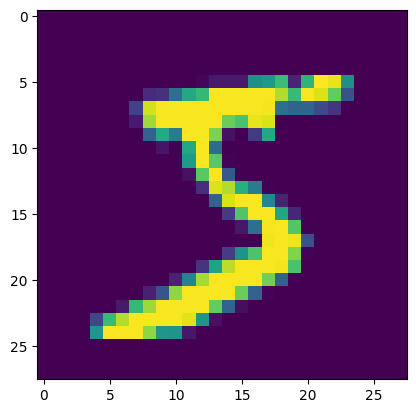

In [4]:
plt.imshow(X_train[0])

In [5]:
X_train = X_train/255
X_test = X_test/255

## Basic AutoEncoder

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD

In [7]:
783/2

391.5

In [8]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

In [9]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [10]:
autoencoder = Sequential([encoder, decoder])
autoencoder.compile(loss="binary_crossentropy",optimizer=SGD(lr=1.5),metrics=['accuracy'])

In [11]:
autoencoder.fit(X_train, X_train, epochs=5,validation_data=[X_test, X_test])

Epoch 1/5
1875/1875 [==============================] - 33s 16ms/step - loss: 0.6904 - accuracy: 0.0388 - val_loss: 0.6874 - val_accuracy: 0.0433
Epoch 2/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.6832 - accuracy: 0.0443 - val_loss: 0.6771 - val_accuracy: 0.0425
Epoch 3/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.5224 - accuracy: 0.0504 - val_loss: 0.2784 - val_accuracy: 0.0690
Epoch 4/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2723 - accuracy: 0.0692 - val_loss: 0.2680 - val_accuracy: 0.0704
Epoch 5/5
1875/1875 [==============================] - 29s 16ms/step - loss: 0.2665 - accuracy: 0.0696 - val_loss: 0.2644 - val_accuracy: 0.0711


In [12]:
passed_images = autoencoder.predict(X_test[:10])

1/1 [==============================] - 0s 165ms/step


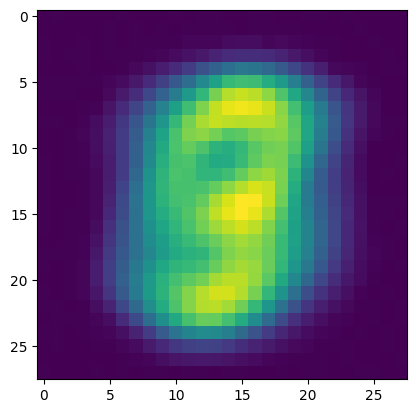

In [13]:
plt.imshow(passed_images[0])

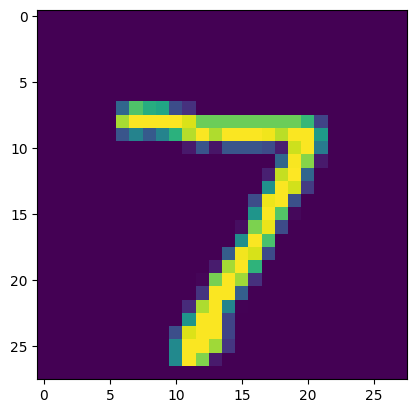

In [14]:
plt.imshow(X_test[0])

# AutoEncoders for Denoising Images

In [15]:
from tensorflow.keras.layers import GaussianNoise

In [16]:
sample = GaussianNoise(0.2)

In [17]:
noisey = sample(X_test[0:2],training=True)

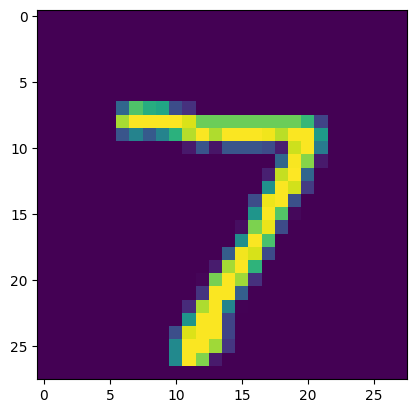

In [18]:
plt.imshow(X_test[0])

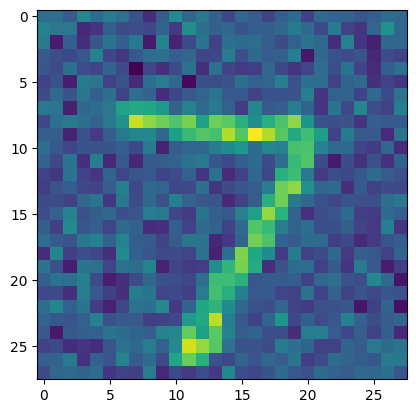

In [19]:
plt.imshow(noisey[0])

In [20]:
import tensorflow as tf
import numpy as np

In [21]:

tf.random.set_seed(101)
np.random.seed(101)


encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))

# Add noise to images before going through autoencoder

encoder.add(GaussianNoise(0.2))
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

In [22]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [23]:
noise_remover = Sequential([encoder, decoder])

In [24]:
noise_remover.compile(loss="binary_crossentropy", optimizer='adam',metrics=['accuracy'])

In [25]:
noise_remover.fit(X_train, X_train, epochs=8,
                           validation_data=[X_test, X_test])

Epoch 1/8
1875/1875 [==============================] - 34s 17ms/step - loss: 0.1817 - accuracy: 0.1697 - val_loss: 0.1448 - val_accuracy: 0.2151
Epoch 2/8
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1383 - accuracy: 0.2245 - val_loss: 0.1295 - val_accuracy: 0.2328
Epoch 3/8
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1287 - accuracy: 0.2391 - val_loss: 0.1202 - val_accuracy: 0.2440
Epoch 4/8
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1211 - accuracy: 0.2479 - val_loss: 0.1156 - val_accuracy: 0.2529
Epoch 5/8
1875/1875 [==============================] - 31s 17ms/step - loss: 0.1175 - accuracy: 0.2524 - val_loss: 0.1133 - val_accuracy: 0.2548
Epoch 6/8
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1152 - accuracy: 0.2564 - val_loss: 0.1111 - val_accuracy: 0.2606
Epoch 7/8
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1133 - accuracy: 0.2600 - val_loss: 0.1091 - val_ac

In [26]:
ten_noisey_images = sample(X_test[0:10],training=True)
denoised = noise_remover(ten_noisey_images[0:10])

The Original


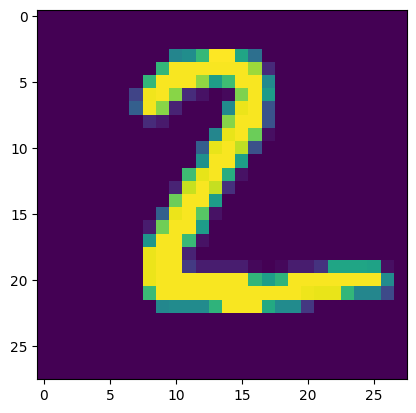

The Noisey Version


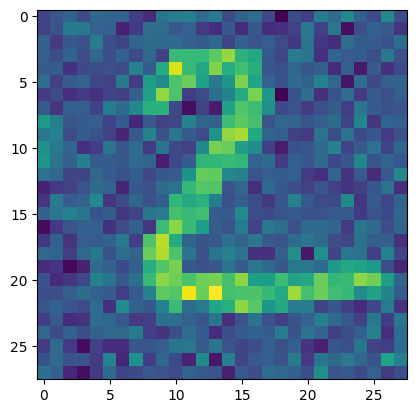

After going through denoiser


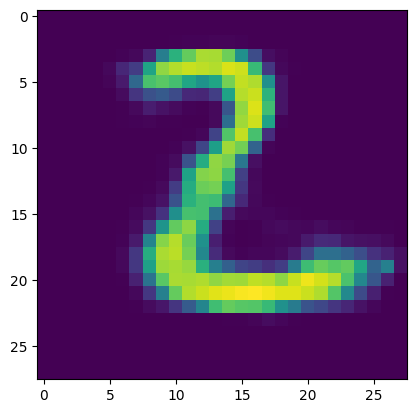

In [27]:
n = 1
print("The Original")
plt.imshow(X_test[n])
plt.show()
print("The Noisey Version")
plt.imshow(ten_noisey_images[n])
plt.show()
print("After going through denoiser")
plt.imshow(denoised[n])
plt.show()